<a href="https://colab.research.google.com/github/IrzalMuhammadPrasetyo/Tugas-Python/blob/main/Tugas_11_Klasifikasi_daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [25]:
ls

'10-Irzal Muhammad Prasetyo.pdf'
'1101194061_Irzal Muhammad Prasetyo.pdf'
'1101194061_Irzal Muhammad Prasetyo.rar'
'1. Jagoan Arduino.pdf'
'(2)1101194061_Irzal Muhammad Prasetyo.pdf'
'(3)1101194061_Irzal Muhammad Prasetyo.pdf'
'(4)1101194061_Irzal Muhammad Prasetyo.pdf'
'CAAS UPCI'/
'CamScanner 08-27-2020 16.22.27.pdf'
'Colab Notebooks'/
 Foto/
 IMG20200127174944.jpg
 IMG20201011221532_00.jpg
'Irzal Muhammad Prasetyo_1101194061.pdf'
'Irzal Muhammad Prasetyo_1101194061_UTSPDA.pdf'
'Kelas X_SMK_teknik_telekomunikasi_pramudi_utomo.pdf'
'PDA TT-43-06'/
 Python/
'Screenshot (196).png'
'Screenshot (228).png'
'Screenshot (233).png'
'Screenshot (236).png'
'Screenshot (239).png'
'Screenshot (252).png'
'Screenshot (98).png'
'Screenshot (99).png'
'SELASA(3)_TT04306(I)_IRZAL MUHAMAD P_1101194061_JW.pdf'
'Selasa(3) TT06(i) Irzal Muhammad P 1101194061 JW.jpeg'
'Survey Kepuasan Pelanggan Telkomsel.gform'
'TEI2A3 - RANGKAIAN LISTRIK B TT-43-06'/
'Teknik Dasar Elektronika analog.pdf'
 TEKNIK-KERJA-BENG

In [26]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [27]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Python")
data = []
labels = []

[INFO] loading images...


In [29]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [30]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [31]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [32]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [33]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 64, 64, 3)
(148, 64, 64, 3)


In [47]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (4,4), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (4,4), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 61, 61, 8)         392       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 16)        2064      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               270500    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [48]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [50]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [51]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 18ms/step - loss: 1.5550 - accuracy: 0.3649 - val_loss: 1.4179 - val_accuracy: 0.3986
Epoch 2/25
14/14 [==============================] - 0s 6ms/step - loss: 1.2845 - accuracy: 0.4865 - val_loss: 1.3073 - val_accuracy: 0.4054
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 1.1246 - accuracy: 0.5586 - val_loss: 1.1662 - val_accuracy: 0.5338
Epoch 4/25
14/14 [==============================] - 0s 6ms/step - loss: 1.0320 - accuracy: 0.5946 - val_loss: 1.1366 - val_accuracy: 0.5473
Epoch 5/25
14/14 [==============================] - 0s 6ms/step - loss: 0.9265 - accuracy: 0.6464 - val_loss: 1.0352 - val_accuracy: 0.6216
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.7745 - accuracy: 0.7342 - val_loss: 1.1038 - val_accuracy: 0.5203
Epoch 7/25
14/14 [==============================] - 0s 6ms/step - loss: 0.6996 - accuracy: 0.7432 - val_loss: 0.9316 - val_accuracy: 0.6622
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


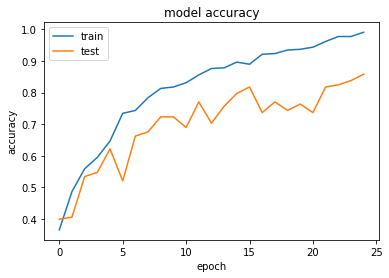

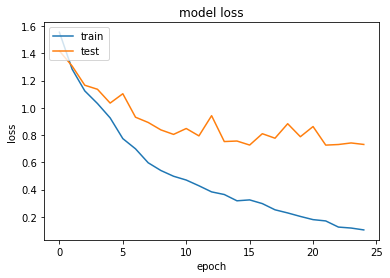

In [52]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.79      0.85      0.81        26
      GMB_03       0.84      0.84      0.84        25
      GMB_05       0.88      0.88      0.88        34
      GMB_10       0.86      0.89      0.87        27
      GMB_11       0.91      0.83      0.87        36

    accuracy                           0.86       148
   macro avg       0.85      0.86      0.86       148
weighted avg       0.86      0.86      0.86       148



In [54]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [87]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200918_103009.jpg'

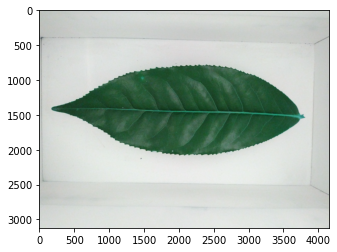

In [91]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [93]:
image_testing = Image.open('IMG_20200918_103009.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [94]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [95]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.2710792  0.5509582  0.17796251]]
['GMB_03']
